### Introducción

recordemos que K-means es un modelo no supervisado, por lo que no necesitaremos hacer un split de nuetsros datos en train y set. Recordemos que en este caso, necesitamos escalar nuestros datos previamente

### ¿Para qué queremos aplicar Clustering?

Buscamos una clasificación óptima en nuestros datos de income para poder trabajar con los diferentes tipos de perfiles de familias que, como vimos en el análisis exploratorio de nuestros datos, existen.

### ¿Por qué aplicar K-means?

Es un clustering simple y rápido de aplicar

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D #al final no hice uso de ella 
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report


In [38]:
data = pd.read_csv("datos-new.csv")

In [3]:
#Definimos nuestra variable target

y = data[['T.H.I']]
X = data.drop('T.H.I', axis = 1)
X.head()

T.F.E   Tobacco  I.H.R.V  MCareExp  Tra.Exp  G.F.G.E  H.H.Age  Floor.Area  \
0  204969    Smoker    90000      3469    50448        0       42          24   
1   50545    Smoker     4500       470     2100        0       40          50   
2   74240  NoSmoker    90000       545     4032        0       76          77   
3   57793    Smoker     7200      2320     2676        0       54          40   
4   87578  NoSmoker        0       240    39960        0       35          45   

   House.Age    PPN  ...  Electricity               Young.Members    Roof  \
0         25  52769  ...           Si  between 5 and 17 years old  Strong   
1         14  37504  ...           Si  between 5 and 17 years old   Light   
2         20  52697  ...           Si                 No children  Strong   
3         18  40016  ...           Si  between 5 and 17 years old   Light   
4         10  24785  ...           Si                 No children  Strong   

    TenueStatus    TypeHousehold         Worker            TypeBuilding  \
0    Fully_Paid  Extended Family      Freelance            Single house   
1    Fully_Paid    Single Family      Freelance            Single house   
2    Fully_Paid    Single Family  Civil_Servant            Single house   
3  Partial_Paid  Extended Family      Freelance            Single house   
4    Fully_Paid  Extended Family       Employee  Multi-unit residential   

    Walls Toilet            Water  
0  Strong   Good  Good conditions  
1   Light   Poor  Good conditions  
2  Strong   Good  Good conditions  
3  Strong   Good   Bad conditions  
4  Strong   Good  Good conditions  

[5 rows x 43 columns]

In [4]:
y.head()

T.H.I
0  936116
1  100365
2  236605
3  112447
4  402008

K-means no es un modelo que funcione con categoricas. En su defecto, podemos hacer dos cosas:

* Trabajar solo con nuestras variables numéricas

* Transformar las variables categóricas en numéricas con un get_dummies

En previos estudios ya vimos como la alta correlación en nuestras variables afecta negativamente a nuestros modelos. Por suerte, tras aplicar reducciones de dimensionalidad, conseguimos quedarnos con las 4 variables más influyentes de nuestra variable predictora, reduciendo notablemente la correlación entre variables

No tiene sentido gastar esfuerzo en transformar nuestras variables categóricas si estas no aportan valor a nuestros resultados. por ello, trabajaremos solo con las numéricas

In [39]:
# sacamos la lista de variables numericas del dataset
X_num_features = X._get_numeric_data()

Recordemos el tipo de datos de nuestra variable con un .info(). Podemos ver, que tratamos con 12 variables numéricas y 31 categoricas

In [6]:
X_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   T.F.E       7001 non-null   int64
 1   I.H.R.V     7001 non-null   int64
 2   MCareExp    7001 non-null   int64
 3   Tra.Exp     7001 non-null   int64
 4   G.F.G.E     7001 non-null   int64
 5   H.H.Age     7001 non-null   int64
 6   Floor.Area  7001 non-null   int64
 7   House.Age   7001 non-null   int64
 8   PPN         7001 non-null   int64
 9   CYP         7001 non-null   int64
 10  GL          7001 non-null   int64
 11  BYS         7001 non-null   int64
dtypes: int64(12)
memory usage: 656.5 KB


## Escalando nuestros datos

Antes de empezar con nuestro modelo, debemos de transformar nuestros datos a valores similares, escalándolos. por ello, utilizaremos StandardScaler() , para pasar nuestros datos a rangos de entre -2 a 2. 

Esta función pasa nuestro data Frame a un numply array, por lo que deberemos de volver a cambiar el output creado a formato dataframe de pandas

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_num_features)
Xs = scaler.transform(X_num_features)
print(Xs)

[[ 2.28387827  1.62978582 -0.14146174 ...  2.71591373  2.55593665
   3.13070512]
 [-0.67151366 -0.40096871 -0.24682413 ... -0.59634342 -0.71404493
  -0.38685722]
 [-0.21803485  1.62978582 -0.24418919 ... -0.39280988 -0.34459578
   0.9146914 ]
 ...
 [ 0.5741512  -0.22283235 -0.20283823 ...  1.02275336  0.11934106
  -0.30960069]
 [-0.1363723   0.20469492 -0.04628778 ... -0.01828303 -0.34368286
  -0.23487182]
 [-0.41940662 -0.22283235 -0.24331088 ... -0.40568777 -0.1072354
  -0.19055004]]


In [16]:
Xs = pd.DataFrame(data=Xs, columns=['T.F.E', 'I.H.R.V', 'MCareExp', 'Tra.Exp','G.F.G.E', 'H.H.Age','Floor.Area','House.Age','PPN','CYP','GL','BYS'])

Xs.head()

T.F.E   I.H.R.V  MCareExp   Tra.Exp   G.F.G.E   H.H.Age  Floor.Area  \
0  2.283878  1.629786 -0.141462  2.274665 -0.365228 -0.684111   -0.573460   
1 -0.671514 -0.400969 -0.246824 -0.561693 -0.365228 -0.824963   -0.111422   
2 -0.218035  1.629786 -0.244189 -0.448351 -0.365228  1.710374    0.368387   
3 -0.532800 -0.336840 -0.181829 -0.527902 -0.365228  0.161001   -0.289129   
4  0.037230 -0.507851 -0.254905  1.659382 -0.365228 -1.177093   -0.200275   

   House.Age       PPN       CYP        GL       BYS  
0   0.311409  0.074488  2.715914  2.555937  3.130705  
1  -0.438167 -0.535245 -0.596343 -0.714045 -0.386857  
2  -0.029307  0.071612 -0.392810 -0.344596  0.914691  
3  -0.165594 -0.434908 -0.403615 -0.610057 -0.487801  
4  -0.710740 -1.043283 -0.858738  0.866199  1.251972

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)
y = y.flatten()
print(y)

[ 2.50344296 -0.54764592 -0.05027248 ... -0.27358673 -0.23573976
 -0.40733068]


In [18]:
y = pd.DataFrame(data=y, columns=['T.H.I'])
y.head()

T.H.I
0  2.503443
1 -0.547646
2 -0.050272
3 -0.503538
4  0.553567

### Definiendo el número de clusters óptimo

Antes de empezarcon nuestro modelo, debemos de determinar cual es el número óptimo de clusters para nuestra variable target. Decidimos calcular la inercia y la representaremos para visualizar más facilmente el k óptimo

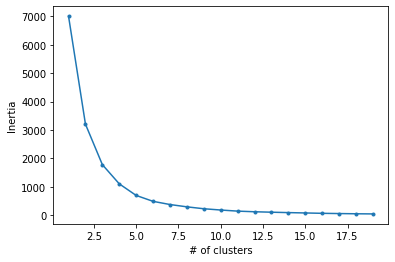

In [19]:
from sklearn.cluster import KMeans

K = range(1,20)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(y)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

## Trabajando con nuestro modelo K-means

In [20]:
Kmeans = KMeans(n_clusters = 3, random_state = 0).fit(y) #queremos hacer 3 clusters de nuestro income: bajo, medio y alto
#clusters = kmeans.fit_predict(y)
Kmeans.cluster_centers_


array([[-0.33493214],
       [ 1.15315909],
       [ 5.38492017]])

In [21]:
Kmeans.labels_

y["labels"] = Kmeans.labels_

y.head(5)

T.H.I  labels
0  2.503443       1
1 -0.547646       0
2 -0.050272       0
3 -0.503538       0
4  0.553567       1

In [22]:
Xs['T.F.E'].head()

0    2.283878
1   -0.671514
2   -0.218035
3   -0.532800
4    0.037230
Name: T.F.E, dtype: float64

Nos aseguramos que tanto los datos en la variable target como los datos en la variable y trabajan en los mismos rangos viendo sus distribuciones

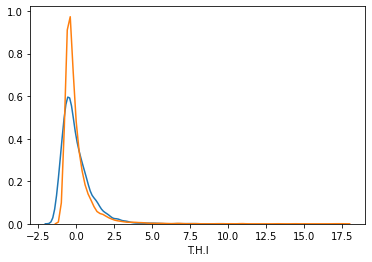

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(Xs['T.F.E'],hist=False, bins=10);
sns.distplot(y['T.H.I'],hist=False, bins=10);

#sns.distplot(ys['labels'],hist=False, bins=10);

En la siguiente gráfica, podemos ver cómo nuestro modelo a clusterizado nuestros detos income, haciendo diferencias entre income mas bajos, medias y altas. 

Podemos tambien ver que la cantidad de income categorizado en label 0 (valores más bajos) tiene mayor frecuencia que el resto de etiquetas. Tiene sentido, pues ya vimos, que la población que aparece en este data set es mayoritariamente pobre, por lo que el cluster con más datos debería de ser el que presenta varlores de income más bajos

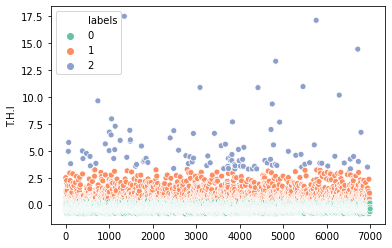

In [36]:
ax = sns.scatterplot(x= np.arange(0,len(y)),y = 'T.H.I', hue='labels',
                     data=y, palette='Set2')

#ax1 = plt.scatter(y['T.H.I'], np.arange(0,len(y)))

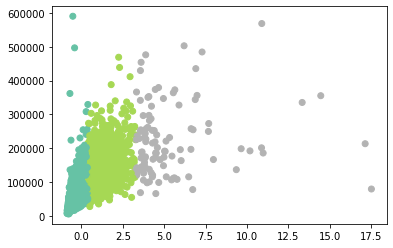

In [37]:
# mostrando los centroides en nuestra variable target y una de las principales variables predictoras
plt.scatter(y['T.H.I'], X['T.F.E'], c= Kmeans.labels_, cmap='Set2')

plt.show()

### Bonus point: Silouette analysis

Otra medida a tener en cuenta para determinar el número óptimo de clusters es el silhouette score. Alto s valores muestra que los objetos están siendo bien emarejados con su cluster y mal emparejado con sus clusters vecinos. Esta medida se calcula con la distacia euclidea entre los diferentes puntos 

In [26]:
from sklearn.metrics import silhouette_score
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(y)
    centers = clusterer.cluster_centers_

    score = silhouette_score(y, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7647236752428854)
For n_clusters = 3, silhouette score is 0.7708108001160097)
For n_clusters = 4, silhouette score is 0.7681375841314724)
For n_clusters = 5, silhouette score is 0.6183638534158175)
For n_clusters = 6, silhouette score is 0.6326769766362946)
For n_clusters = 7, silhouette score is 0.6329138983421022)
For n_clusters = 8, silhouette score is 0.6258925082624641)
For n_clusters = 9, silhouette score is 0.571963232743673)


Comprobamos que efectivamente, el score más alto coincide con k = 3, como ocurría al estudiar su inercia. Por lo tanto confirmamos, que, para nuetsro data set, el número óptimo de clusters será 3 